# Machine Learning with Feature Scaling: Comparison between a Logistic Regession and a Random Forest Classification model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

## The data set we are going to work on regards bike rental data in Toronto:

In [2]:
data=pd.read_csv('bikes_sharing.csv')

In [3]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Let's consider that any date in which the bike rental count is over 200 to be "high count", and also convert the datetime column from string to actual datetime:

In [4]:
data["high_count"] = data["count"]>200
data["datetime"] = pd.to_datetime(data["datetime"])
data["hour"] = data["datetime"].dt.hour
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,high_count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,False,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,False,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,False,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,False,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,True,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,True,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,False,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,False,22


## Choosing the independent (x) and dependent (y) variables:

In [5]:
X = data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']]
y=data['high_count']

## Performing a train/test split in order to avoid overfitting:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Now, since the variables show a big difference in terms of maximum and minimum values, a feature scaling is necessary to increase model accuracy:

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## The first model we are going to perform on the train data is a Logistic Regression:

In [8]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled,y_train)

LogisticRegression()

In [9]:
predictions = logmodel.predict(X_test_scaled)

In [10]:
log_acc=accuracy_score(y_test,predictions)
log_acc

0.7621671258034894

In [11]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.79      0.83      0.81      1342
        True       0.70      0.66      0.68       836

    accuracy                           0.76      2178
   macro avg       0.75      0.74      0.75      2178
weighted avg       0.76      0.76      0.76      2178



## Now, the second model we are going to perform is a Random Forest Classifier and compare to the Logistic Regression accuracy:

In [12]:
X = data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']]
y=data['high_count']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [15]:
pred = rf_clf.predict(X_test)

In [16]:
rf_acc=accuracy_score(y_test,pred)
rf_acc

0.8921028466483012

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.91      0.91      0.91      1339
        True       0.86      0.86      0.86       839

    accuracy                           0.89      2178
   macro avg       0.89      0.89      0.89      2178
weighted avg       0.89      0.89      0.89      2178



## Printing a confusion matrix in order to display the correct and incorrect predictions of the Random Forest Classifier model:

<Figure size 2000x1500 with 0 Axes>

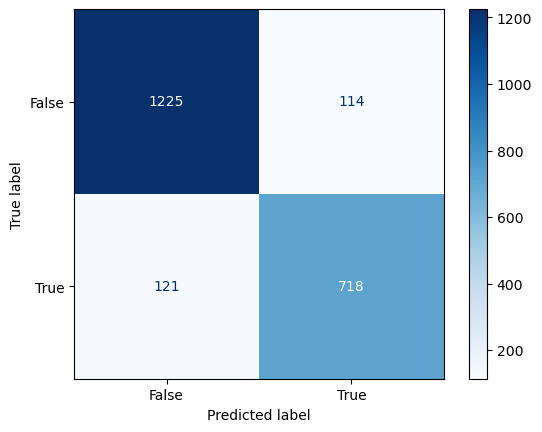

In [18]:
from sklearn.metrics import plot_confusion_matrix
with plt.style.context("default"):
  fig = plt.figure(figsize=(20,15))
  ax = plot_confusion_matrix(rf_clf, X_test, y_test, values_format="", cmap="Blues")

## In the Random Forest Classification model, we can also print a function called "Feature Importance", which shows the importance of each predictor on the resulting y variable:

In [19]:
df_imp = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp

,Feature Importance
hour,0.431492
humidity,0.128916
atemp,0.116771
temp,0.106821
windspeed,0.084624
season,0.053668
workingday,0.041892
weather,0.032250
holiday,0.003566


## We can clearly see that the "hour" feature shows the greatest importance in the classification model

## Displaying the accuracy results of both the Logistic Regression and the Random Forest models:

In [20]:
result=pd.DataFrame([log_acc,rf_acc],index=['Log Model Accuracy','Random Forest Accuracy'],columns=['Value'])
result

,Value
Log Model Accuracy,0.762167
Random Forest Accuracy,0.892103


## It can be concluded that the Random Forest model showed better accuracy.